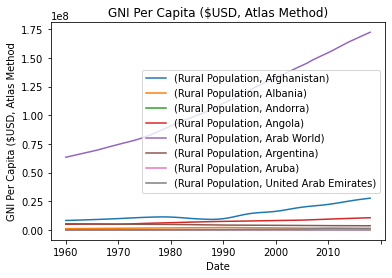

In [117]:
import wbdata
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'SP.RUR.TOTL':'Rural Population'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=all_countries_iso[:10], convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

In [124]:
def get_data(indicators={'SP.RUR.TOTL':'Rural Population'}, ):
    import datetime
 
    #set up the indicator I want (just build up the dict if you want more than one)
    indicators = {'SP.RUR.TOTL':'Rural Population'}
    data_date = (datetime.datetime(2010, 1, 1), datetime.datetime(2019, 1, 1))
 
    #grab indicators above for countires above and load into data frame
    df = wbdata.get_dataframe(indicators, country=all_countries_iso[:10], convert_date=False, data_date=data_date)

    #df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
    dfu = df.unstack(level=0)
    
    return dfu

In [83]:
all_countries = wbdata.get_country('all', display=False)

In [178]:
import pandas as pd
import plotly.graph_objs as go

def cleandata(dataset, keepcolumns = ['Country Name', '1990', '2015'], value_variables = ['1990', '2015']):
    """Clean world bank data for a visualizaiton dashboard
    Keeps data range of dates in keep_columns variable and data for the top 10 economies
    Reorients the columns into a year, country and value
    Saves the results to a csv file
    Args:
        dataset (str): name of the csv data file
    Returns:
        None
    """    
    df = pd.read_csv(dataset, skiprows=4)

    # Keep only the columns of interest (years and country name)
    df = df[keepcolumns]

    top10country = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Brazil', 'Italy', 'Canada']
    df = df[df['Country Name'].isin(top10country)]

    # melt year columns  and convert year to date time
    df_melt = df.melt(id_vars='Country Name', value_vars = value_variables)
    df_melt.columns = ['country','year', 'variable']
    df_melt['year'] = df_melt['year'].astype('datetime64[ns]').dt.year

    # output clean csv file
    return df_melt

def return_figures():
    """Creates four plotly visualizations
    Args:
        None
    Returns:
        list (dict): list containing the four plotly visualizations
    """

  # first chart plots arable land from 1990 to 2015 in top 10 economies 
  # as a line chart
    
    graph_one = []
    countrylist = dfu['Rural Population'].columns
    
    for country in countrylist:
        x = dfu['date']

        graph_one.append(
          go.Scatter(
          x = x,
          y = dfu['Rural Population'][country],
          mode = 'lines',
          name = country
          )
      )

    layout_one = dict(title = 'Rural Population <br> per Person 1990 to 2019',
                xaxis = dict(title = 'Year',
                  autotick=False, tick0=1990, dtick=25),
                yaxis = dict(title = 'Hectares'),
                )

# second chart plots ararble land for 2015 as a bar chart    
    graph_two = []
    df_new = dfu[dfu['date'] == 2015] 

    graph_two.append(
      go.Bar(
      x = df_new.columns,
      y = dfu['Rural Population'][country],
      )
    )

    layout_two = dict(title = 'Hectares Arable Land per Person in 2015',
                xaxis = dict(title = 'Country',),
                yaxis = dict(title = 'Hectares per person'),
                )


# third chart plots percent of population that is rural from 1990 to 2015
#     graph_three = []
#     df = cleandata('data/API_SP.RUR.TOTL.ZS_DS2_en_csv_v2_9948275.csv')
#     df.columns = ['country', 'year', 'percentrural']
#     df.sort_values('percentrural', ascending=False, inplace=True)
#     for country in countrylist:
#         x_val = df[df['country'] == country].year.tolist()
#         y_val =  df[df['country'] == country].percentrural.tolist()
#         graph_three.append(
#           go.Scatter(
#           x = x_val,
#           y = y_val,
#           mode = 'lines',
#           name = country
#           )
#       )

#     layout_three = dict(title = 'Change in Rural Population <br> (Percent of Total Population)',
#                 xaxis = dict(title = 'Year',
#                   autotick=False, tick0=1990, dtick=25),
#                 yaxis = dict(title = 'Percent'),
#                 )
    
# # fourth chart shows rural population vs arable land
#     graph_four = []
    
#     valuevariables = [str(x) for x in range(1995, 2016)]
#     keepcolumns = [str(x) for x in range(1995, 2016)]
#     keepcolumns.insert(0, 'Country Name')

#     df_one = cleandata('data/API_SP.RUR.TOTL_DS2_en_csv_v2_9914824.csv', keepcolumns, valuevariables)
#     df_two = cleandata('data/API_AG.LND.FRST.K2_DS2_en_csv_v2_9910393.csv', keepcolumns, valuevariables)
    
#     df_one.columns = ['country', 'year', 'variable']
#     df_two.columns = ['country', 'year', 'variable']
    
#     df = df_one.merge(df_two, on=['country', 'year'])

#     for country in countrylist:
#         x_val = df[df['country'] == country].variable_x.tolist()
#         y_val = df[df['country'] == country].variable_y.tolist()
#         year = df[df['country'] == country].year.tolist()
#         country_label = df[df['country'] == country].country.tolist()

#         text = []
#         for country, year in zip(country_label, year):
#             text.append(str(country) + ' ' + str(year))

#         graph_four.append(
#           go.Scatter(
#           x = x_val,
#           y = y_val,
#           mode = 'markers',
#           text = text,
#           name = country,
#           textposition = 'top'
#           )
#       )

#     layout_four = dict(title = 'Rural Population versus <br> Forested Area (Square Km) 1990-2015',
#                 xaxis = dict(title = 'Rural Population'),
#                 yaxis = dict(title = 'Forest Area (square km)'),
#                 )
    
    # append all charts to the figures list
    figures = []
    figures.append(dict(data=graph_one, layout=layout_one))
    figures.append(dict(data=graph_two, layout=layout_two))
#     figures.append(dict(data=graph_three, layout=layout_three))
#     figures.append(dict(data=graph_four, layout=layout_four))

    return figures

In [179]:
return_figures()

[{'data': [Scatter({
       'mode': 'lines',
       'name': 'Afghanistan',
       'x': array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
                   '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
                   '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
                   '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
                   '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                   '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                   '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object),
       'y': array([ 8241137.,  8373138.,  8512056.,  8657977.,  8810646.,  8970246.,
                    9133645.,  9300654.,  9475708.,  9665503.,  9872695., 10095982.,
                   10327925., 10557926., 10772082., 10958232., 11121482., 11259228.,
                   11343620., 11340121., 

In [169]:
dfu['Rural Population']

country,Afghanistan,Albania,Andorra,Angola,Arab World,Argentina,Aruba,United Arab Emirates
0,8241137.0,1114818.0,5572.0,4885711.0,63400576.0,5404937.0,26685.0,24491.0
1,8373138.0,1146208.0,5609.0,4934184.0,64431688.0,5367316.0,27297.0,25821.0
2,8512056.0,1180553.0,5616.0,4980158.0,65477725.0,5337550.0,27693.0,27751.0
3,8657977.0,1214693.0,5601.0,5019278.0,66521133.0,5305827.0,27934.0,29915.0
4,8810646.0,1248887.0,5554.0,5043512.0,67557423.0,5271908.0,28108.0,31861.0
5,8970246.0,1282417.0,5482.0,5049018.0,68572508.0,5236547.0,28278.0,33384.0
6,9133645.0,1315273.0,5385.0,5031680.0,69660117.0,5198821.0,28462.0,34382.0
7,9300654.0,1348911.0,5264.0,4998127.0,70898252.0,5159781.0,28639.0,35190.0
8,9475708.0,1386348.0,5125.0,4967545.0,72139770.0,5119955.0,28811.0,36891.0
9,9665503.0,1424962.0,4975.0,4965496.0,73364488.0,5081215.0,28988.0,41027.0


In [84]:
all_countries_iso = [all_countries[i]['iso2Code'] for i in range(len(all_countries))]

In [119]:
all_countries_iso[:10]

['AW', 'AF', 'A9', 'AO', 'AL', 'AD', 'L5', '1A', 'AE', 'AR']

In [109]:
def get_countries(country='all', name=None, longitude=None, latitude=None, item='iso2Code'):
    """
    Description: Obtains the information on a country using the IsoCode/name as 
        identifier to obtain for one country and 'all' as identifier for all country
    
    Arguments:
        country (str): default is all. use country name or Iso2Code for specific country
        name (bool): default is none. set as True to obtain the name of the countries.
        longitude (bool): default is none. set as True to obtain just the longitude of the countries
        latitude (bool): default is none. set as True to obtain the latitude of the countries
        item (str): default is iso2Code. change to name, longitude or latitude to obtain the information
    
    Returns:
        item (str): the specified item in the function
    """
    if name:
        item = 'name'
    elif longitude:
        item = 'longitude'
    elif latitude:
        item = 'latitude'
    if country == 'all':
        countries = wbdata.get_country('all', display=False)
        countries_iso = [countries[i][item] for i in range(len(countries))]
        return countries_iso
    else:
        countries = wbdata.get_country(country, display=False)
        countries_iso = [countries[i][item] for i in range(len(countries))]
        return countries_iso

In [96]:
def get_countries(country='all'):
    if country == 'all':
        countries = wbdata.get_country('all', display=False)
        countries_iso = [countries[i]['iso2Code'] for i in range(len(countries))]
        return countries_iso
    else:
        countries = wbdata.get_country(country, display=False)
        countries_iso = [countries[i]['iso2Code'] for i in range(len(countries))]
        return countries_iso

In [115]:
# get_countries(country='all', item='longitude')

In [114]:
# wbdata.get_indicator(display=False)

In [136]:
dfu.reset_index(inplace=True)

In [154]:
dfu['date'] = dfu['date'].astype(int).apply(lambda x: datetime.datetime(x,1,1).strftime('%Y'))

In [158]:
dfu.head()

date Rural Population                                            \
country            Afghanistan    Albania Andorra     Angola  Arab World   
0        1960        8241137.0  1114818.0  5572.0  4885711.0  63400576.0   
1        1961        8373138.0  1146208.0  5609.0  4934184.0  64431688.0   
2        1962        8512056.0  1180553.0  5616.0  4980158.0  65477725.0   
3        1963        8657977.0  1214693.0  5601.0  5019278.0  66521133.0   
4        1964        8810646.0  1248887.0  5554.0  5043512.0  67557423.0   

                                                  
country  Argentina    Aruba United Arab Emirates  
0        5404937.0  26685.0              24491.0  
1        5367316.0  27297.0              25821.0  
2        5337550.0  27693.0              27751.0  
3        5305827.0  27934.0              29915.0  
4        5271908.0  28108.0              31861.0

In [163]:
import plotly.graph_objects as go
import datetime

x = dfu['date']

fig = go.Figure(data=[go.Scatter(x=x, y=dfu['Rural Population']['Afghanistan'])])
# Use datetime objects to set xaxis range
# fig.update_layout(xaxis_range=[datetime.datetime(2013, 10, 17),
#                                datetime.datetime(2013, 11, 20)])
fig.show()

In [162]:
dfu['Rural Population']['Afghanistan']

0      8241137.0
1      8373138.0
2      8512056.0
3      8657977.0
4      8810646.0
5      8970246.0
6      9133645.0
7      9300654.0
8      9475708.0
9      9665503.0
10     9872695.0
11    10095982.0
12    10327925.0
13    10557926.0
14    10772082.0
15    10958232.0
16    11121482.0
17    11259228.0
18    11343620.0
19    11340121.0
20    11220137.0
21    10990181.0
22    10673561.0
23    10312659.0
24     9962974.0
25     9670307.0
26     9430372.0
27     9247189.0
28     9178456.0
29     9365968.0
30     9783754.0
31    10470848.0
32    11392158.0
33    12424891.0
34    13398640.0
35    14194409.0
36    14759602.0
37    15136305.0
38    15416181.0
39    15736082.0
40    16192155.0
41    16816935.0
42    17569613.0
43    18387486.0
44    19163180.0
45    19829986.0
46    20378030.0
47    20836789.0
48    21257441.0
49    21714081.0
50    22257743.0
51    22904895.0
52    23632788.0
53    24404522.0
54    25165917.0
55    25877997.0
56    26530269.0
57    27131559.0
58    27695286